In [1]:
import torch
import numpy as np

import matplotlib.colors
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from pandas import DataFrame

from sklearn.metrics import classification_report

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seed = 42

color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","cyan","magenta","blue"])

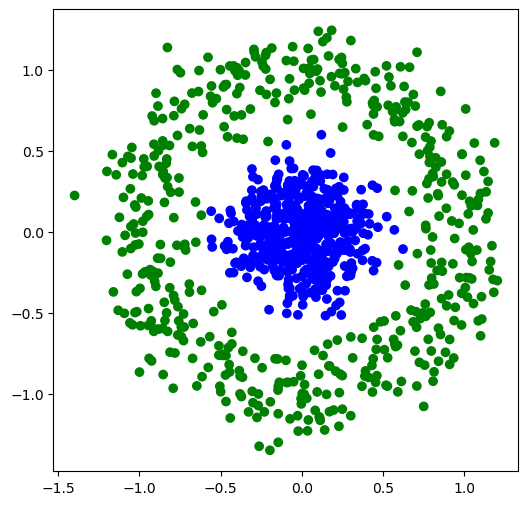

In [3]:
# generate 2d classification dataset
X, y_hat = make_circles(n_samples=1000, noise=0.15, random_state=seed, factor=0.2)

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

axis.scatter(X[:,0],
             X[:,1],
             c=y_hat,
             vmin=min(y_hat),
             vmax=max(y_hat),
             cmap=color_map_discrete)

In [9]:
def viz_model(model_, y_hatt, x, y):
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    axis[0].set_xlim([min(X[:,0])-1, max(X[:,0]+1)])
    axis[0].set_ylim([min(X[:,1])-1, max(X[:,1]+1)])
    
    axis[0].scatter(X[:,0],
                    X[:,1],
                    c=y_hatt,
                    vmin=min(y_hatt),
                    vmax=max(y_hatt),
                    cmap=color_map_discrete)

    x1 = np.linspace(min(x[:, 0]), max(x[:, 0]))

    for w, b in zip(model_[0].state_dict()['weight'], 
                    model_[0].state_dict()['bias']):
        w1 = w[0]
        w2 = w[1]
        x2 = -(w1*x1 / w2) - (b/w2)

        axis[0].plot(x1, x2, 'k-', label='line 1')

    axis[1].scatter(list(range(len(y))),
                    y.detach().numpy(),
                    c=y_hat,
                    vmin=min(y_hatt),
                    vmax=max(y_hatt),
                    cmap=color_map_discrete)

    axis[0].set_title("First layer feature space [x1; x2]")
    axis[1].set_title("Second layer feature space y")


    fig.subplots_adjust(hspace=0.3,wspace=.3)
    plt.show()

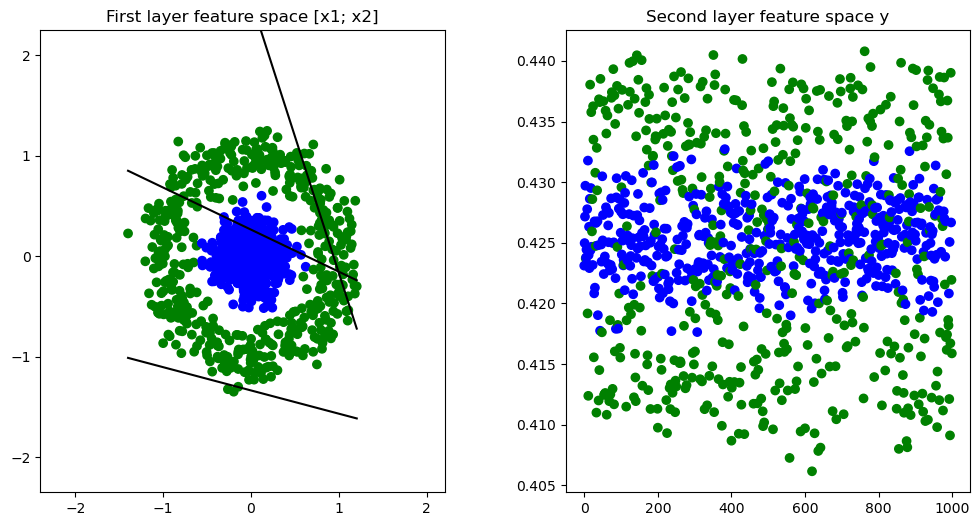

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       500
         1.0       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



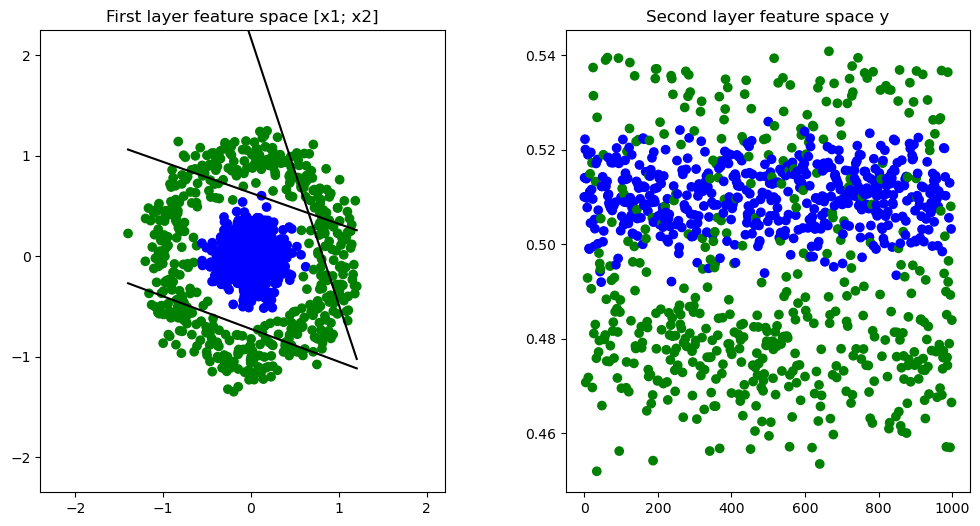

              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78       500
         1.0       0.74      0.93      0.83       500

    accuracy                           0.81      1000
   macro avg       0.83      0.81      0.80      1000
weighted avg       0.83      0.81      0.80      1000



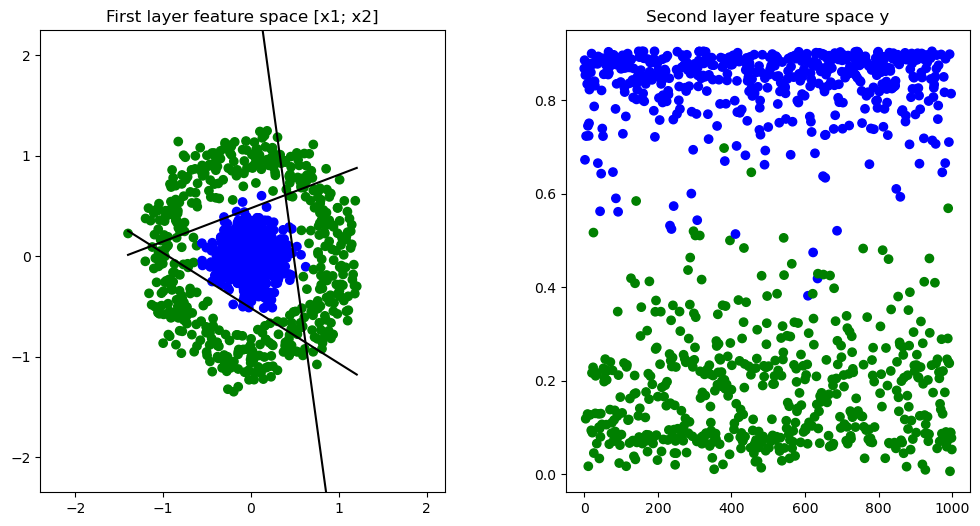

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       500
         1.0       0.98      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



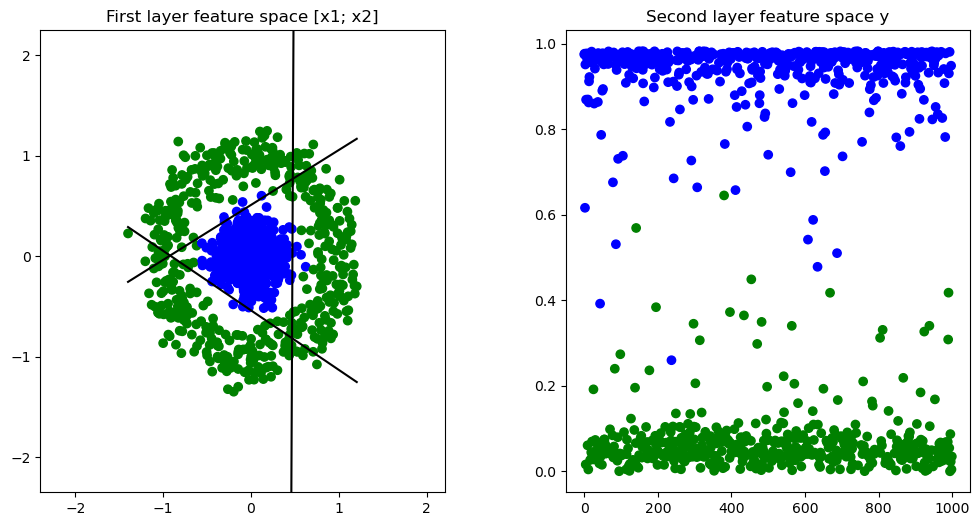

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       500
         1.0       1.00      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



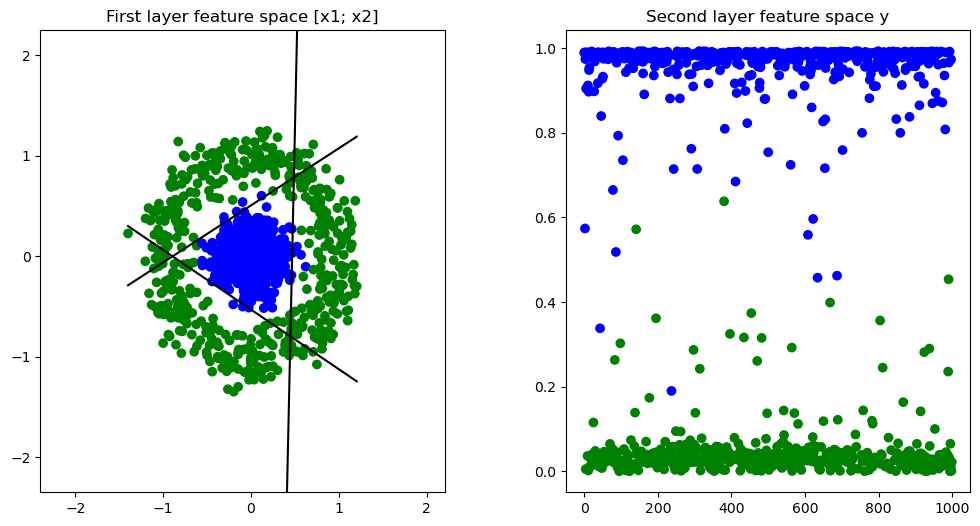

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       500
         1.0       1.00      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



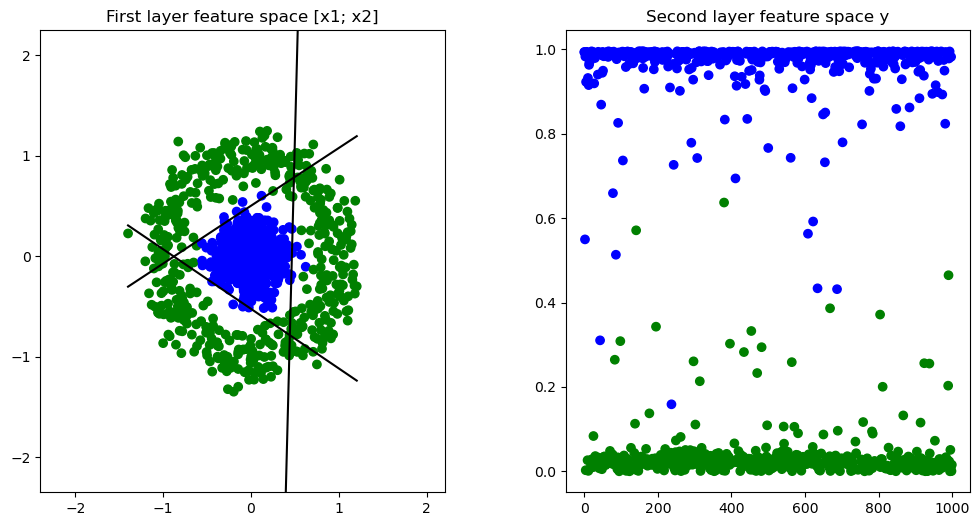

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       500
         1.0       1.00      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



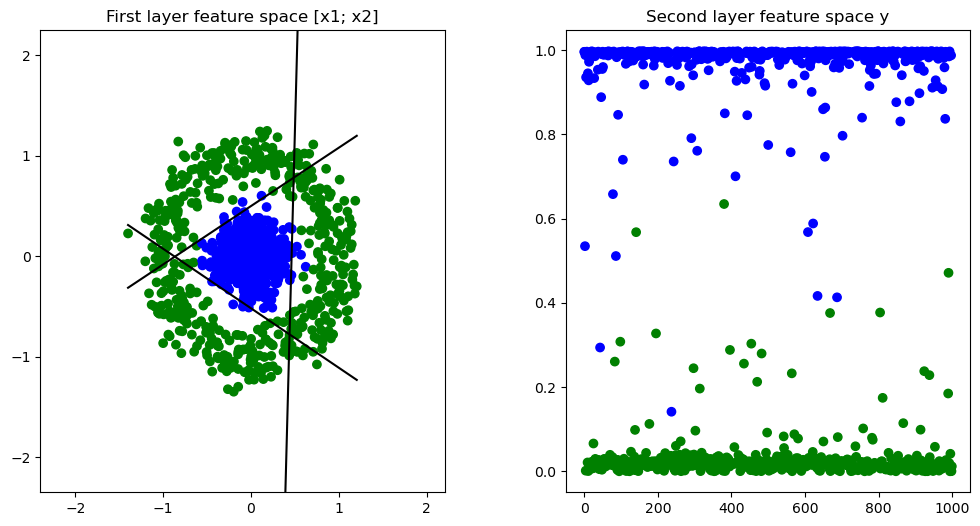

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       500
         1.0       1.00      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



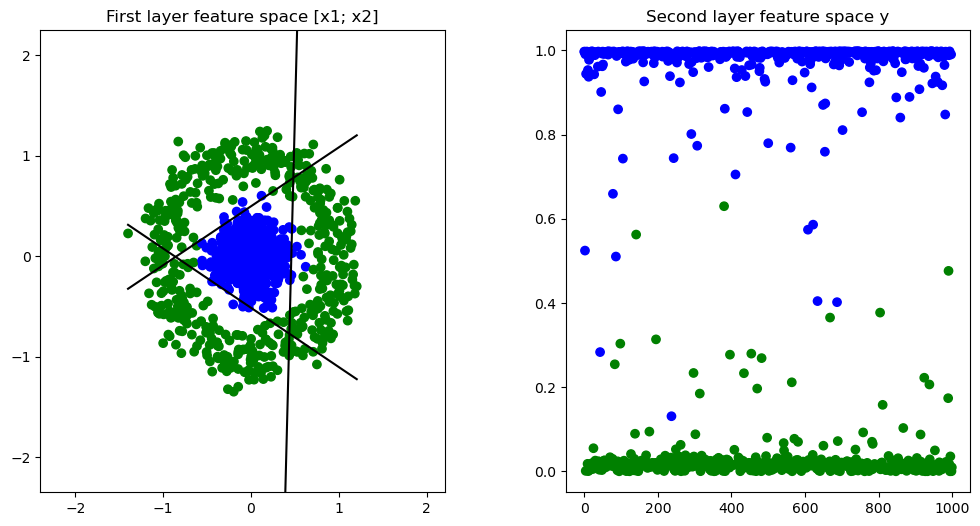

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       500
         1.0       1.00      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [10]:
iterations = 2400
viz_every = 300

model = torch.nn.Sequential(torch.nn.Linear(in_features=2, out_features=3),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(in_features=3, out_features=1),
                            torch.nn.Sigmoid())

loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

y_hat = torch.Tensor(y_hat).float().reshape((1000, 1))
x = torch.Tensor(X)
loss_list = []

for i in range(iterations):
    optimizer.zero_grad()

    y = model(x)
    loss = loss_fn(y, y_hat)
    loss_list.append(loss.data)

    loss.backward()
    optimizer.step()
    
    if i%viz_every==0:
        viz_model(model_=model, y_hatt=y_hat, x=x, y=y)
        print(classification_report(y_hat, (y > 0.5).detach().numpy()))

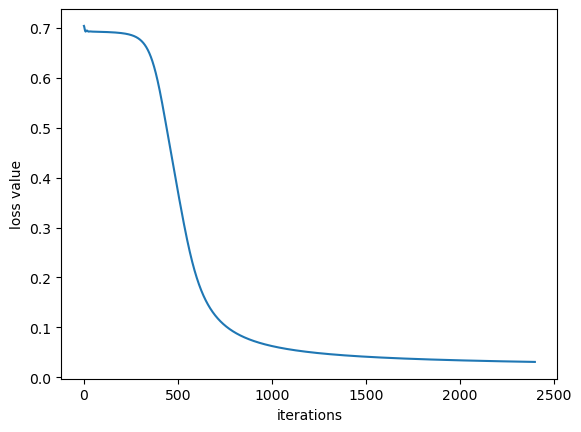

In [11]:
plt.plot(loss_list)
plt.xlabel('iterations') 
plt.ylabel('loss value') 
plt.show()